In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns


# Setting  up seeds for the model and data splitting randomnes for reproducibility and consistency
np.random.seed(42)
random_state=42

# Read data from file
dataTrain = pd.read_csv('train.csv')


dataTrain.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
# Read data from file

dataTest = pd.read_csv('test.csv')

dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
import numpy as np
import pandas as pd

def clean_dataset(df, name="Data", columns=None, inplace=False):
    """
    Cleans a DataFrame by:
    - Converting empty strings or spaces to NaN
    - Dropping rows with any NaN (or only in specific columns)

    Args:
        df (pd.DataFrame): Your dataset
        name (str): Name for reporting
        columns (list): If specified, drops rows only if NaN in these columns
        inplace (bool): If True, modifies df in place

    Returns:
        Cleaned DataFrame
    """
    if not inplace:
        df = df.copy()

    # Step 1: Replace blank strings or spaces with real NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Step 2: Count before
    before = df.shape[0]

    # Step 3: Drop rows with NaN in general or in specific columns
    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    # Step 4: Count after
    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")

dataTrain = dataTrain.drop(columns=['Unnamed: 0', 'id'])
dataTest = dataTest.drop(columns=['Unnamed: 0', 'id'])


dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 83 row(s) with missing or blank fields.


satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


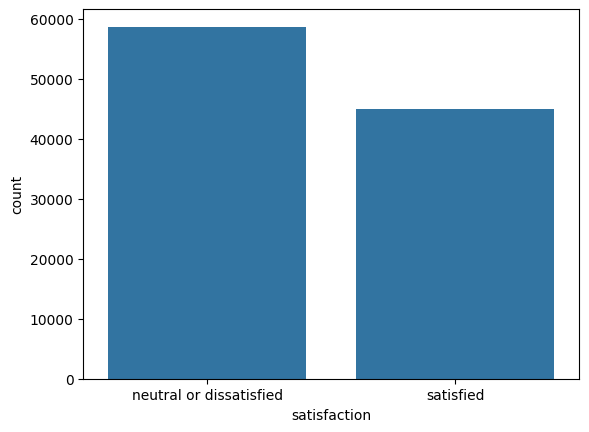

In [ ]:

# For training set
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())



satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


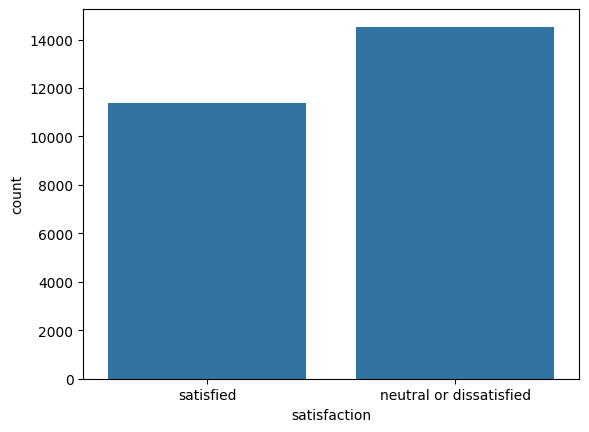

In [ ]:
# For test set
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())


In [ ]:
print(dataTrain.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [ ]:

hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

# Since the following are simply binary categories, transforming them to 0 and 1 (adjust according to your dataset)
label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])  # Use transform on test data
    label_encoders[col] = le

# 999 indicates client was not previously contacted, change to -1 for less variance
#dataTrain.pdays = dataTrain.pdays.replace(999, -1)
#dataTest.pdays = dataTest.pdays.replace(999, -1)

# Set output "no" to 0 and "yes" to 1 (adjust this for the target column in your dataset)
print(dataTrain['satisfaction'].unique())  # Before mapping

# Fix mapping
dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

dataTest['satisfaction'] = dataTest['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())  # After mapping


# Show first 10 rows of the train dataset
dataTrain.head(10)


['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0
5,0,0,26,1,1180,3,4,2,1,1,...,4,4,4,4,1,0,0.0,0,1,0
6,1,0,47,1,1276,2,4,2,3,2,...,3,4,3,5,2,9,23.0,0,1,0
7,0,0,52,0,2035,4,3,4,4,5,...,5,5,4,5,4,4,0.0,1,0,0
8,0,0,41,0,853,1,2,2,2,4,...,2,1,4,1,2,0,0.0,0,0,0
9,1,1,20,0,1061,3,3,3,4,2,...,3,4,4,3,2,0,0.0,0,1,0


In [ ]:
print(dataTrain.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [ ]:
X = dataTrain.drop(columns=['satisfaction'])
y = dataTrain['satisfaction']

z = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X, y)


(103594, 23)
(103594, 23)


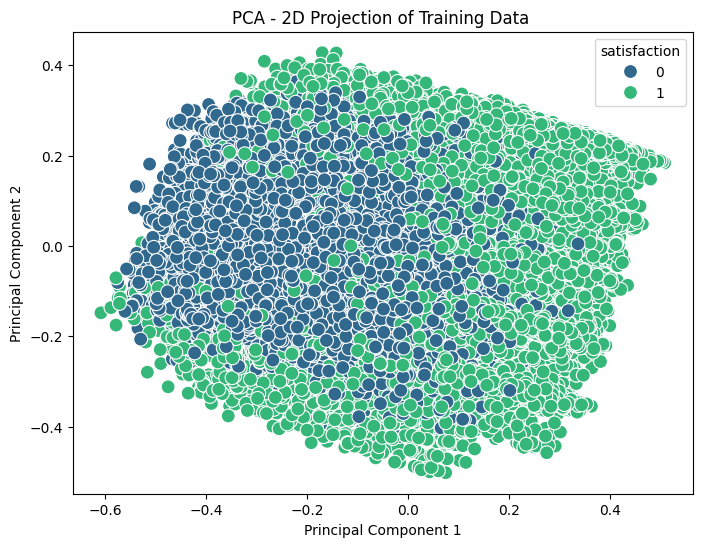

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(z)

'''
#  Min-Max Normalization (Scaling to [0, 1])
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
X_test_minmax = min_max_scaler.transform(z)
'''

def decimal_scaling(X):
    max_abs = np.max(np.abs(X), axis=0)
    j = np.ceil(np.log10(max_abs + 1))
    return X / (10 ** j)


# Checking the shape of X_train
print(X_train.shape)  #  (n_samples, n_features)

# Appling  decimal scaling to the features
X_train_decimal = decimal_scaling(X_train)
X_test_decimal = decimal_scaling(X_test)

# Checking the shape of the scaled features
print(X_train_decimal.shape)  # Should print (n_samples, n_features)

# Appling PCA for dimensionality reduction (reduce to 2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_decimal)  # Using decimal scaled features
X_test_pca = pca.transform(X_test_decimal)  # Apply PCA to test set

'''
#how much information is captured by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
'''


# Scatter plot of the 2D PCA-transformed data

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y, palette='viridis', s=100, marker='o')
plt.title('PCA - 2D Projection of Training Data ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan','chebyshev'] # Distance metric
}

# Setting up Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting the model on the training data
grid_search.fit(X_train, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Getting the top 5 best results
top_5_results = grid_search.cv_results_['mean_test_score']

# Sortting the results and get the indices of the top 5
sorted_indices = top_5_results.argsort()[-5:][::-1]

# Print the top 5 best results
print("\nTop 5 best results:")
for i in sorted_indices:
    print(f"Parameters: {grid_search.cv_results_['params'][i]}, Accuracy: {grid_search.cv_results_['mean_test_score'][i]}")


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best accuracy: 0.9358457394313208

Top 5 best results:
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}, Accuracy: 0.9358457394313208
Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}, Accuracy: 0.9354885681545897
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}, Accuracy: 0.9354210029169477
Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}, Accuracy: 0.9352955053825405
Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}, Accuracy: 0.934310890696378


k values tested: [3, 5, 7, 9]
Accuracies: [0.9331093345691885, 0.9364306955547832, 0.9380141350944271, 0.9385548217665006]
Losses: [0.06689066543081146, 0.0635693044452168, 0.061985864905572896, 0.061445178233499376]
Precisions: [0.9379830862962626, 0.9444800146345925, 0.9470502015390253, 0.9499171423310624]
Recalls: [0.9076110866695997, 0.9085789705235372, 0.9096348438187417, 0.9078750549934008]


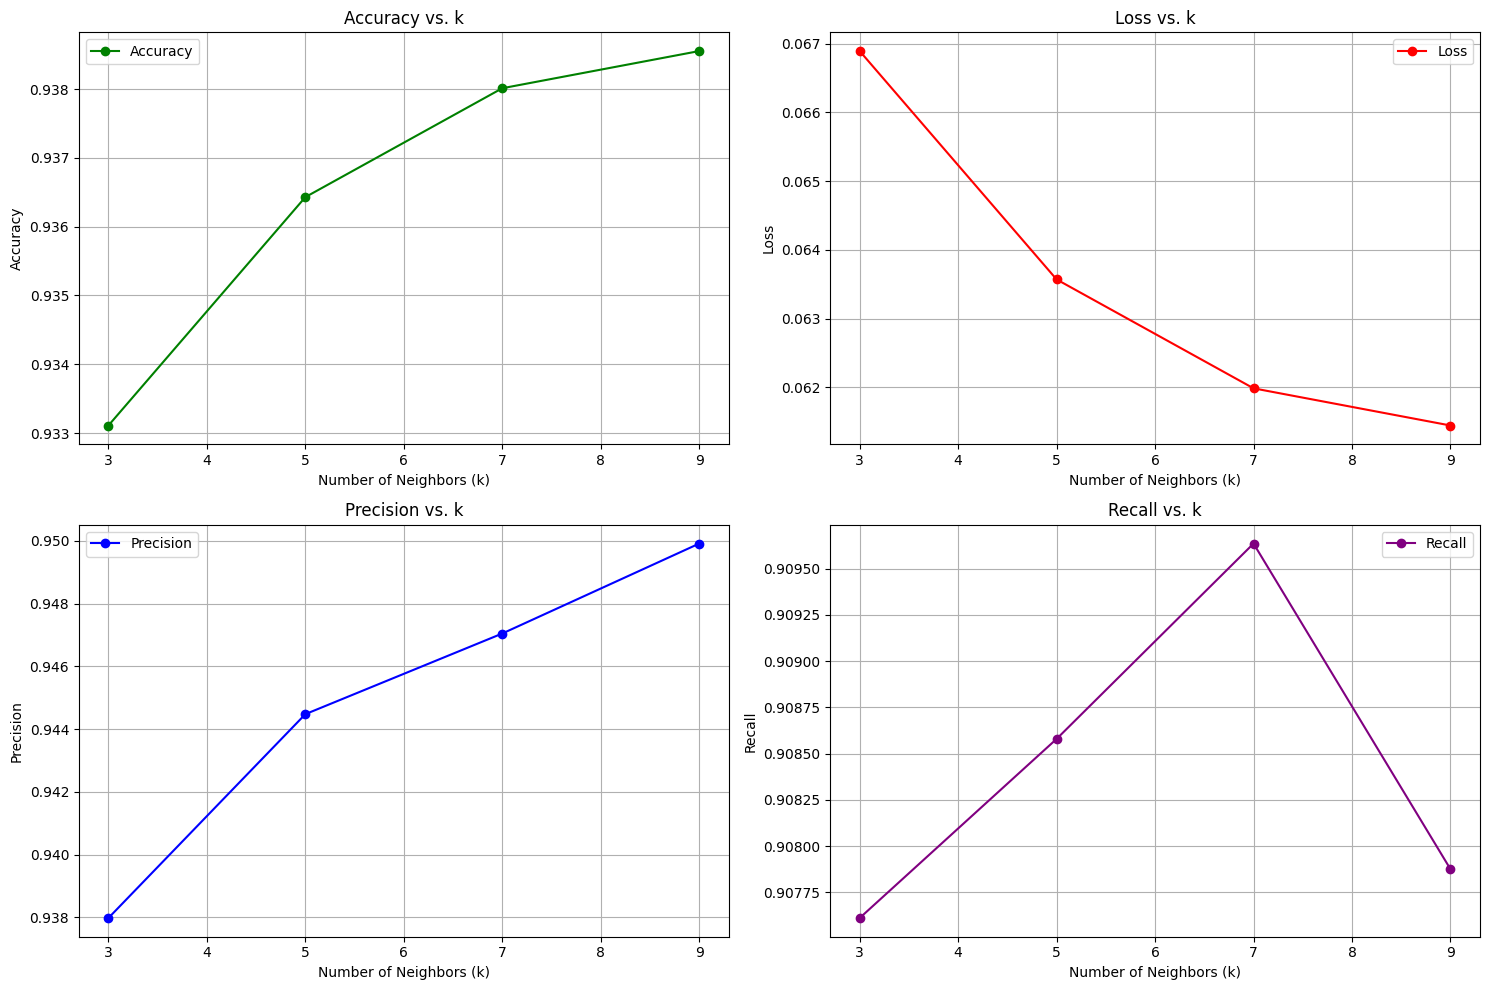

In [ ]:
# This will show how accuracy, loss, precision, and recall change for different values of k, using the results from the best metric and weight.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


k_values = [3, 5, 7, 9]
accuracies = []
losses = []
precisions = []
recalls = []

# Iterate over k values
for k in k_values:

    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='manhattan'
    )

    # Fitting the model
    knn.fit(X_train, y)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculating accuracy, loss, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    loss = 1 - accuracy  # Loss = misclassification rate
    precision = precision_score(y_test, y_pred, pos_label=1)  # Precision for 'yes' class
    recall = recall_score(y_test, y_pred, pos_label=1)  # Recall for 'yes' class

    # Storing results
    accuracies.append(accuracy)
    losses.append(loss)
    precisions.append(precision)
    recalls.append(recall)

# Displaing the results
print("k values tested:", k_values)
print("Accuracies:", accuracies)
print("Losses:", losses)
print("Precisions:", precisions)
print("Recalls:", recalls)

# Plot accuracies, losses, precision, and recall
plt.figure(figsize=(15, 10))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(k_values, accuracies, marker='o', label='Accuracy', color='green')
plt.title('Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(k_values, losses, marker='o', label='Loss', color='red')
plt.title('Loss vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Precision plot
plt.subplot(2, 2, 3)
plt.plot(k_values, precisions, marker='o', label='Precision', color='blue')
plt.title('Precision vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision')
plt.grid()
plt.legend()

# Recall plot
plt.subplot(2, 2, 4)
plt.plot(k_values, recalls, marker='o', label='Recall', color='purple')
plt.title('Recall vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Evaluation Metrics for KNN (k=7):
      Metric           Value
0   Accuracy       93.855482
1       Loss        6.144518
2  Precision       94.991714
3     Recall       90.787505
4   F1-Score       92.842039
5    ROC AUC       56.394622
6    Support  [14528, 11365]


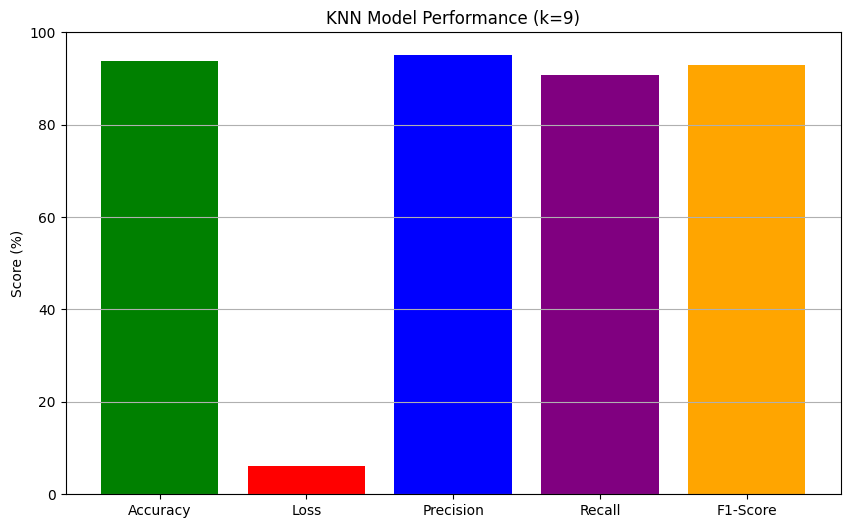

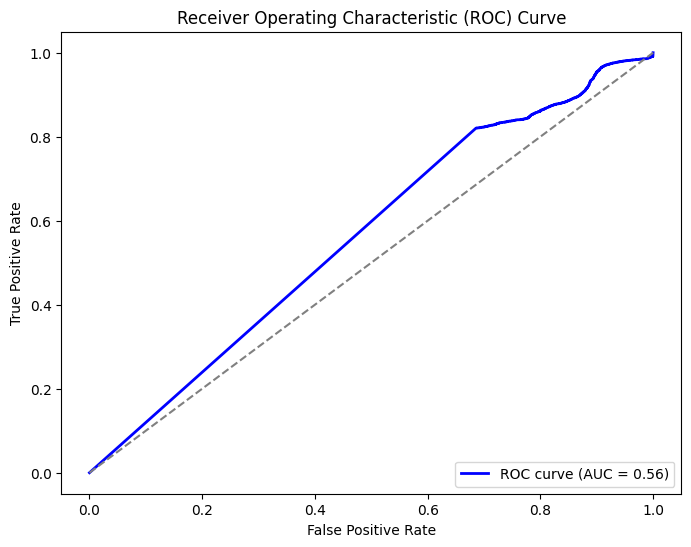

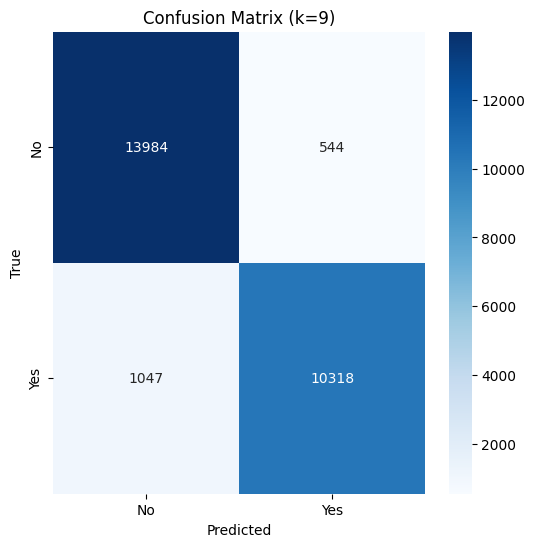

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

k = 9

knn = KNeighborsClassifier(
    n_neighbors=k,
    weights='distance',
    metric='manhattan'
)

# Fitting the model
knn.fit(X_train, y)

# Predicting on the test data
y_pred = knn.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
loss = (1 - accuracy_score(y_test, y_pred)) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred, pos_label=1) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred, pos_label=1) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred, pos_label=1) * 100  # Convert to percentage

# ROC Curve and AUC
y_prob = knn.predict_proba(z)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculating support (number of occurrences of each class in the test set)
cm = confusion_matrix(y_test, y_pred)
support = cm.sum(axis=1)

# Creating a summary table with percentage values
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Loss', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Support'],
    'Value': [accuracy, loss, precision, recall, f1, roc_auc * 100, support]
})

print("Evaluation Metrics for KNN (k=7):")
print(results)

# Plotting the metrics
metrics = ['Accuracy', 'Loss', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, loss, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['green', 'red', 'blue', 'purple', 'orange'])
plt.title(f'KNN Model Performance (k={k})')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix (k={k})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
